In [57]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
%matplotlib inline

Data scientist-ы придумали новый алгоритм, который позволяет курьерам запланировать свои последние заказы перед окончанием рабочего дня так, чтобы их маршрут доставки совпадал с маршрутом до дома. То есть, чтобы курьеры доставляли последние свои заказы за день как бы "по пути" домой. <br> <br>
 Часть курьеров использует старый алгоритм без опции "по пути", другие видят в своем приложении эту опцию и могут ее выбрать

In [5]:
data = pd.read_csv('experiment_lesson_4.csv')
data.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


Сформируем гипотезы <br>
H0: Обновление не влияет на время доставки. <br>
H1: Обновление влияет на время доставки.

In [16]:
data.groupby('experiment_group').delivery_time.count()

experiment_group
control    10092
test       10104
Name: delivery_time, dtype: int64

In [43]:
# Сравним среднее время доставки у групп, оно различается, но значимы ли эти различия?
data.groupby('experiment_group').delivery_time.mean()

experiment_group
control    45.065101
test       39.046813
Name: delivery_time, dtype: float64

In [30]:
control_time = data.query('experiment_group == "control"').delivery_time
control_time.head()

0    44.0
1    51.0
2    46.0
3    34.0
4    43.0
Name: delivery_time, dtype: float64

In [32]:
test_time = data.query('experiment_group == "test"').delivery_time
test_time.head()

10092    38.0
10093    31.0
10094    39.0
10095    29.0
10096    31.0
Name: delivery_time, dtype: float64

### Получили выборки данных. Теперь проверим их на нормальность

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='delivery_time', ylabel='Count'>

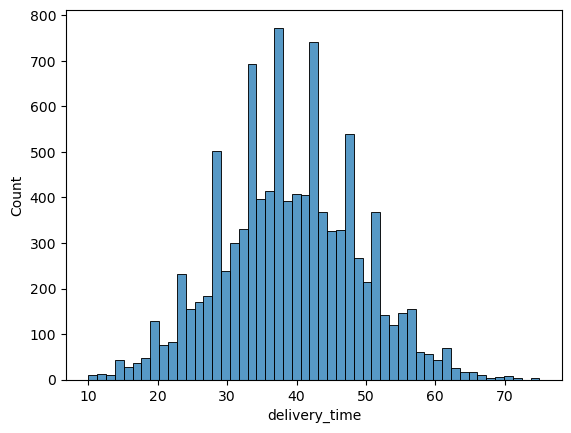

In [38]:
sns.histplot(test_time)

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='delivery_time', ylabel='Count'>

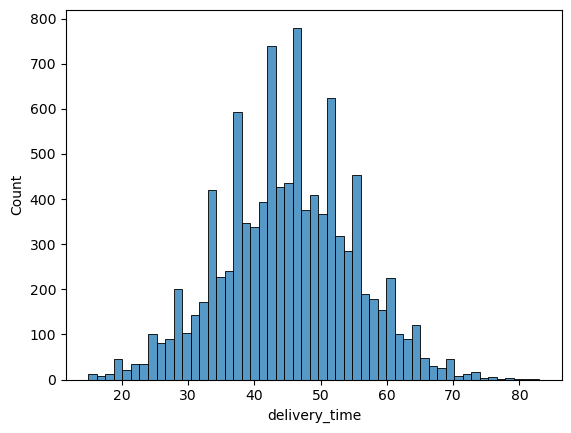

In [40]:
sns.histplot(control_time)

Мы получили статистически значимые различия. Новый алгоритм с опцией "по пути" действительно уменьшает среднее время доставки для нашего A/B теста.

In [47]:
stats.ttest_ind(control_time, test_time)

TtestResult(statistic=43.03582663183714, pvalue=0.0, df=20194.0)

In [63]:
pg.ttest(control_time, test_time) # среднее уменьшение скорости доставки попадает в интервал [5.74 - 6.29] с 95 процентов вероятности

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,43.035552,20191.127788,two-sided,0.0,"[5.74, 6.29]",0.605658,inf,1.0


In [67]:
# trim - отбрасываем 20 процентов слева и справа, т.к. это могут быть выбросы
stats.ttest_ind(control_time, test_time, trim = 0.2)

TtestResult(statistic=42.16055367343425, pvalue=0.0, df=12118.0)

На сколько процентов изменилось среднее время доставки?

In [78]:
(1 - test_time.mean() / control_time.mean()) * 100

13.354653121660808